In [1]:
import importlib
from IPython.display import clear_output

def check_and_install(package):
    try:
        importlib.import_module(package)
        print(f"{package} is already installed.")
    except ImportError:
        !pip install {package}
        clear_output()
        print(f"{package} has been installed successfully.")

In [2]:
libries = ['ultralytics', 'opencv-python', 'yaml']
for lib in libries:
  check_and_install(lib)


opencv-python has been installed successfully.
yaml is already installed.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from ultralytics import YOLO
import cv2
from PIL import Image
import yaml
import random

In [4]:
import torch
torch.cuda.empty_cache()

In [5]:
dataDir = 'brain_tumor_yolo8'

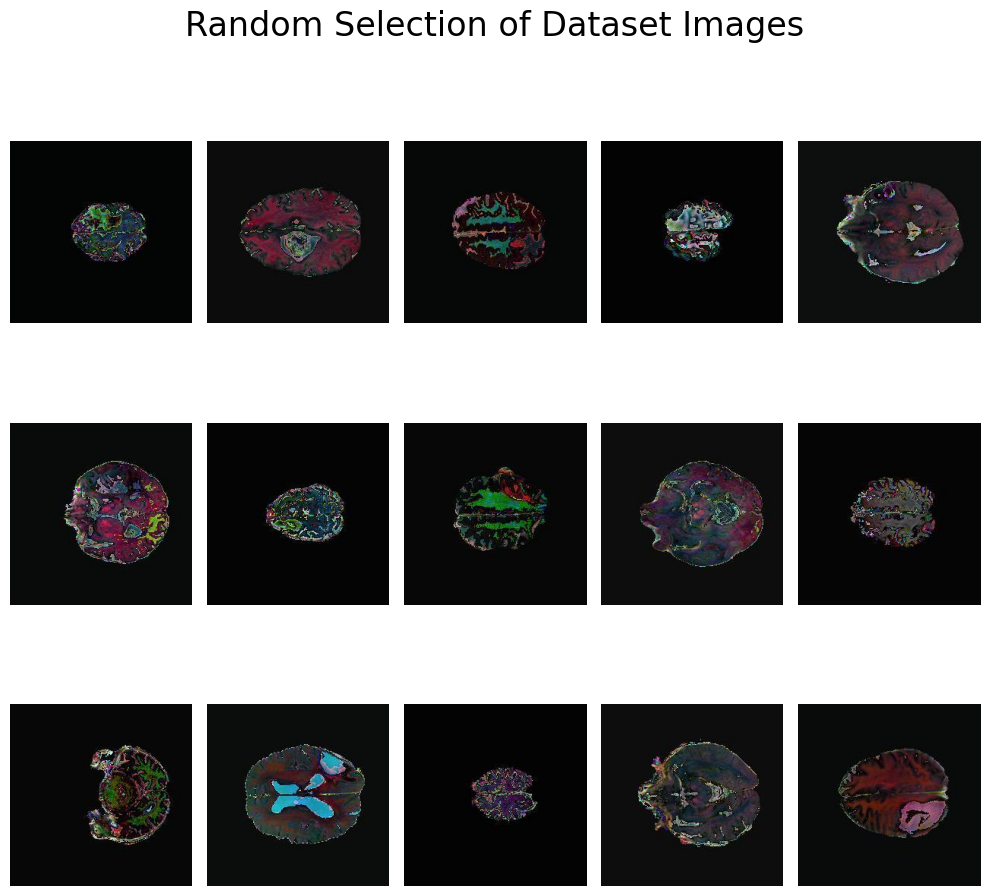

In [6]:
trainImagePath = os.path.join(dataDir, 'train','images')

# List of the images
imageFiles = [f for f in os.listdir(trainImagePath) if f.endswith('.jpg')]

randomImages = random.sample(imageFiles, 15)

plt.figure(figsize=(10, 10))

for i, image_file in enumerate(randomImages):

    image_path = os.path.join(trainImagePath, image_file)
    image = Image.open(image_path)
    plt.subplot(3, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')

  # Add a suptitle
plt.suptitle('Random Selection of Dataset Images', fontsize=24)

# Display the plot
plt.tight_layout()
plt.show()

In [12]:
#model = YOLO('yolov8n-seg.pt')
# sizes: v8n, v8s, v8m, v8l, v8x
# yolov8m.pt
model = YOLO('yolov8n.pt')

In [9]:
yamlFilePath = os.path.join(dataDir,'data.yaml' )

In [16]:
epoch = 50
img_shape = 256 #640

In [17]:
results = model.train(
    data= yamlFilePath,
    epochs=epoch,
    imgsz=img_shape,
    batch=16,
    optimizer='auto',
    lr0=0.0001,              # Initial learning rate
    lrf=0.01,                # Final learning rate (lr0 * lrf)
    dropout=0.25,            # Use dropout regularization
    #device=0,                # Device to run on, i.e. cuda device=0
    patience=5,
    seed=36
)

Ultralytics YOLOv8.2.10  Python-3.12.3 torch-2.3.0+cpu CPU (11th Gen Intel Core(TM) i9-11900K 3.50GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=brain_tumor_yolo8\data.yaml, epochs=50, time=None, patience=5, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=36, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.25, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

train: Scanning C:\Users\user\Documents\GitHub\brain_detection\brain_detection\datasets\brain_tumor_yolo8\train\labels.cache... 6930 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6930/6930 [00:00<?, ?it/s]
val: Scanning C:\Users\user\Documents\GitHub\brain_detection\brain_detection\datasets\brain_tumor_yolo8\valid\labels.cache... 1980 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1980/1980 [00:00<?, ?it/s]

Plotting labels to runs\detect\train2\labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to runs\detect\train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50         0G      1.838      1.823      1.364          6        256: 100%|██████████| 434/434 [05:02<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:45<00:00,  1.37it/s]

                   all       1980       4442      0.496      0.435      0.395      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50         0G      1.882      1.738      1.379         10        256: 100%|██████████| 434/434 [04:57<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]

                   all       1980       4442      0.461      0.428      0.397       0.17



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50         0G      1.864      1.653      1.371          3        256: 100%|██████████| 434/434 [04:52<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:42<00:00,  1.46it/s]

                   all       1980       4442      0.538      0.435      0.431      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50         0G      1.836      1.597      1.346          4        256: 100%|██████████| 434/434 [04:50<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]

                   all       1980       4442       0.55      0.471      0.468      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50         0G      1.802      1.516      1.331          2        256: 100%|██████████| 434/434 [04:56<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:44<00:00,  1.38it/s]

                   all       1980       4442      0.599      0.475      0.479      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50         0G      1.759      1.461      1.309          6        256: 100%|██████████| 434/434 [05:03<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]

                   all       1980       4442      0.549       0.45      0.469      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50         0G      1.745      1.436      1.299         10        256: 100%|██████████| 434/434 [04:59<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:44<00:00,  1.41it/s]

                   all       1980       4442      0.606      0.489      0.499      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50         0G      1.704      1.396      1.283          6        256: 100%|██████████| 434/434 [04:58<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:45<00:00,  1.37it/s]

                   all       1980       4442      0.653      0.485      0.521       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         0G      1.702      1.371      1.283         17        256: 100%|██████████| 434/434 [04:55<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:44<00:00,  1.41it/s]

                   all       1980       4442      0.661      0.522      0.547      0.272



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50         0G      1.686      1.348      1.275          8        256: 100%|██████████| 434/434 [04:53<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:45<00:00,  1.37it/s]

                   all       1980       4442      0.618      0.515      0.538      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50         0G      1.664       1.31       1.27          8        256: 100%|██████████| 434/434 [04:52<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:43<00:00,  1.43it/s]

                   all       1980       4442      0.694      0.526       0.57      0.291



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50         0G      1.665      1.307      1.267          5        256: 100%|██████████| 434/434 [04:52<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]

                   all       1980       4442      0.677       0.53      0.569      0.288



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50         0G       1.65      1.286      1.263          5        256: 100%|██████████| 434/434 [04:52<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:43<00:00,  1.43it/s]

                   all       1980       4442      0.699      0.529       0.58      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50         0G      1.627      1.261      1.247          8        256: 100%|██████████| 434/434 [04:52<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]

                   all       1980       4442       0.72      0.529      0.587      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50         0G      1.619       1.24       1.25         11        256: 100%|██████████| 434/434 [04:51<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:43<00:00,  1.43it/s]

                   all       1980       4442      0.719       0.54      0.591      0.308



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50         0G      1.609      1.223      1.242          8        256: 100%|██████████| 434/434 [04:53<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:45<00:00,  1.37it/s]

                   all       1980       4442      0.719       0.54      0.592      0.314



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50         0G      1.592      1.209      1.236          6        256: 100%|██████████| 434/434 [04:56<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:43<00:00,  1.43it/s]

                   all       1980       4442      0.731      0.544      0.603       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50         0G       1.59      1.206      1.238          6        256: 100%|██████████| 434/434 [04:59<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:48<00:00,  1.28it/s]

                   all       1980       4442      0.729      0.535      0.594       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50         0G      1.585      1.197      1.232          8        256: 100%|██████████| 434/434 [05:21<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:46<00:00,  1.34it/s]

                   all       1980       4442      0.735      0.561      0.613      0.317



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50         0G      1.567      1.179      1.224          6        256: 100%|██████████| 434/434 [05:13<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:44<00:00,  1.40it/s]

                   all       1980       4442      0.729       0.56      0.605      0.312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50         0G      1.562      1.161      1.224          7        256: 100%|██████████| 434/434 [04:55<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:43<00:00,  1.44it/s]

                   all       1980       4442      0.734      0.553      0.617      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50         0G      1.559      1.152       1.22          5        256: 100%|██████████| 434/434 [04:55<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:43<00:00,  1.41it/s]

                   all       1980       4442      0.747       0.56      0.624      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50         0G      1.543       1.14      1.217          5        256: 100%|██████████| 434/434 [04:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:42<00:00,  1.46it/s]

                   all       1980       4442      0.753      0.558      0.619      0.333



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50         0G      1.538       1.12      1.217          4        256: 100%|██████████| 434/434 [04:51<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:43<00:00,  1.42it/s]

                   all       1980       4442      0.768      0.562      0.629      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50         0G      1.538      1.126       1.21          3        256: 100%|██████████| 434/434 [04:49<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:42<00:00,  1.46it/s]

                   all       1980       4442      0.765      0.573      0.637      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50         0G      1.528      1.112       1.21          1        256: 100%|██████████| 434/434 [04:52<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:44<00:00,  1.39it/s]

                   all       1980       4442      0.758       0.57      0.638      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50         0G       1.52      1.106      1.206         10        256: 100%|██████████| 434/434 [04:56<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:42<00:00,  1.44it/s]

                   all       1980       4442       0.77      0.554      0.628      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50         0G      1.507      1.082        1.2          5        256: 100%|██████████| 434/434 [04:55<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:45<00:00,  1.36it/s]

                   all       1980       4442      0.778       0.57      0.642      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50         0G       1.51      1.081      1.197          7        256: 100%|██████████| 434/434 [04:55<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:43<00:00,  1.43it/s]

                   all       1980       4442       0.78      0.567      0.637      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50         0G       1.49      1.084      1.192          6        256: 100%|██████████| 434/434 [04:55<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:44<00:00,  1.38it/s]

                   all       1980       4442      0.793      0.579      0.648      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50         0G       1.48      1.055       1.19         13        256: 100%|██████████| 434/434 [04:54<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:43<00:00,  1.43it/s]

                   all       1980       4442      0.784      0.576      0.646      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50         0G      1.485      1.057      1.186          7        256: 100%|██████████| 434/434 [04:55<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:45<00:00,  1.38it/s]

                   all       1980       4442        0.8      0.572      0.649      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50         0G       1.47      1.055      1.183          4        256: 100%|██████████| 434/434 [04:55<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:43<00:00,  1.44it/s]

                   all       1980       4442        0.8      0.576       0.65      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50         0G      1.469      1.035      1.183          5        256: 100%|██████████| 434/434 [04:54<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:43<00:00,  1.41it/s]

                   all       1980       4442      0.793      0.583      0.654      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50         0G      1.464      1.043      1.185         17        256: 100%|██████████| 434/434 [04:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:42<00:00,  1.45it/s]

                   all       1980       4442      0.791      0.584      0.659      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50         0G      1.447      1.021      1.178          3        256: 100%|██████████| 434/434 [04:51<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:43<00:00,  1.41it/s]

                   all       1980       4442      0.805      0.582      0.658      0.374



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50         0G       1.45      1.015      1.173          5        256: 100%|██████████| 434/434 [04:51<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:42<00:00,  1.45it/s]

                   all       1980       4442      0.799      0.597      0.663      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50         0G      1.433     0.9971      1.173          4        256: 100%|██████████| 434/434 [04:51<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:43<00:00,  1.41it/s]

                   all       1980       4442      0.804      0.596      0.667      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50         0G      1.432      1.008      1.168          9        256: 100%|██████████| 434/434 [04:50<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:42<00:00,  1.46it/s]

                   all       1980       4442      0.815      0.581      0.663      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50         0G      1.414     0.9855       1.16          3        256: 100%|██████████| 434/434 [04:51<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:43<00:00,  1.41it/s]

                   all       1980       4442      0.813      0.593      0.669      0.383


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50         0G      1.405     0.9034      1.196          5        256: 100%|██████████| 434/434 [04:48<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:42<00:00,  1.45it/s]

                   all       1980       4442      0.825      0.593      0.671      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50         0G      1.382      0.886      1.185          4        256: 100%|██████████| 434/434 [04:48<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:44<00:00,  1.41it/s]

                   all       1980       4442      0.835      0.591      0.673      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50         0G      1.375     0.8811      1.179          5        256: 100%|██████████| 434/434 [04:48<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:43<00:00,  1.44it/s]

                   all       1980       4442      0.822        0.6      0.677      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50         0G      1.358     0.8611      1.172          4        256: 100%|██████████| 434/434 [04:49<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:52<00:00,  1.18it/s]

                   all       1980       4442      0.825      0.598      0.676      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50         0G      1.339     0.8467      1.163          5        256: 100%|██████████| 434/434 [05:18<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:43<00:00,  1.43it/s]

                   all       1980       4442      0.821      0.607       0.68        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50         0G      1.332     0.8429      1.159          3        256: 100%|██████████| 434/434 [04:48<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:43<00:00,  1.41it/s]

                   all       1980       4442      0.815      0.608       0.68      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50         0G      1.322      0.831      1.152          4        256: 100%|██████████| 434/434 [04:49<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:42<00:00,  1.45it/s]

                   all       1980       4442      0.824       0.61      0.685      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50         0G      1.325     0.8297      1.153          5        256: 100%|██████████| 434/434 [04:48<00:00,  1.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:43<00:00,  1.42it/s]

                   all       1980       4442      0.819      0.609      0.683      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50         0G      1.316     0.8239      1.144          2        256: 100%|██████████| 434/434 [04:47<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:42<00:00,  1.45it/s]

                   all       1980       4442      0.827      0.607      0.684      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50         0G      1.298     0.8088      1.138          5        256: 100%|██████████| 434/434 [04:46<00:00,  1.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:43<00:00,  1.42it/s]

                   all       1980       4442      0.819      0.614      0.687      0.405



50 epochs completed in 4.713 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 6.2MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics YOLOv8.2.10  Python-3.12.3 torch-2.3.0+cpu CPU (11th Gen Intel Core(TM) i9-11900K 3.50GHz)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 62/62 [00:35<00:00,  1.73it/s]


                   all       1980       4442      0.818      0.615      0.687      0.405
                label0       1980       1268      0.779      0.495      0.587      0.296
                label1       1980       1963      0.859      0.759      0.811      0.536
                label2       1980       1211      0.817      0.591      0.665      0.383
Speed: 0.5ms preprocess, 15.1ms inference, 0.0ms loss, 0.2ms postprocess per image
Results saved to runs\detect\train2


In [19]:
#bestModelpath = 'runs/segment/train/weights/best.pt'
pred_model_path = 'runs/detect/train2/weights/best.pt'
pred_model = YOLO(pred_model_path)


image 1/1 c:\Users\user\Documents\GitHub\brain_detection\brain_detection\brain_tumor_yolo8\test\images\volume_100_slice_105_jpg.rf.76d5a46d0268b812fb2d17702d2c68a2.jpg: 256x256 1 label1, 34.0ms
Speed: 0.0ms preprocess, 34.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 c:\Users\user\Documents\GitHub\brain_detection\brain_detection\brain_tumor_yolo8\test\images\volume_140_slice_116_jpg.rf.3cfff2ba1839f0b6b424bfe7172c3c4b.jpg: 256x256 1 label0, 1 label1, 1 label2, 28.0ms
Speed: 0.0ms preprocess, 28.0ms inference, 1.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 c:\Users\user\Documents\GitHub\brain_detection\brain_detection\brain_tumor_yolo8\test\images\volume_173_slice_133_jpg.rf.2daedbd0b9f91efe96db467fd8b96a97.jpg: 256x256 1 label1, 26.0ms
Speed: 0.0ms preprocess, 26.0ms inference, 0.0ms postprocess per image at shape (1, 3, 256, 256)

image 1/1 c:\Users\user\Documents\GitHub\brain_detection\brain_detection\brain_tumor_yolo8\test\images\

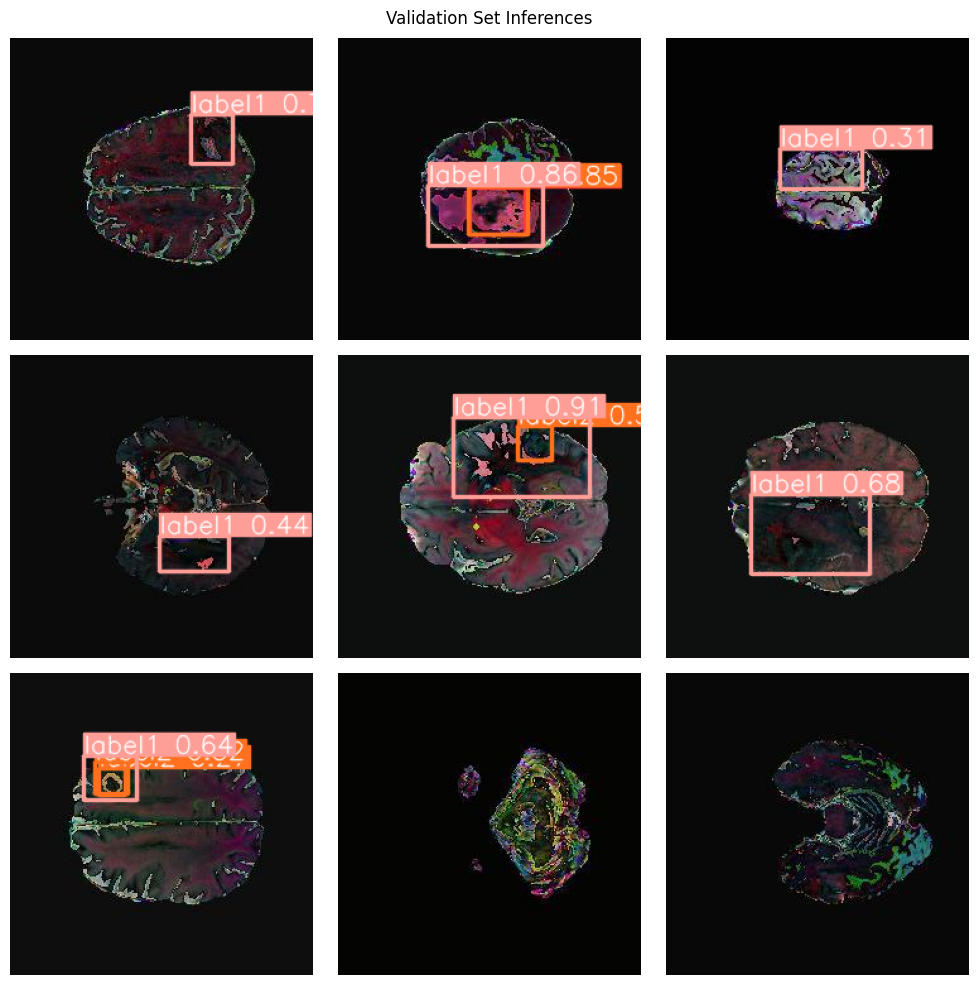

In [20]:
validImagePath = os.path.join(dataDir, 'test', 'images')

imageFiles = [f for f in os.listdir(validImagePath) if f.endswith('.jpg')]

#select Random images
numImages = len(imageFiles)
selectedImage = [imageFiles[i] for i in range(0, numImages, numImages // 9)]

fig, axes = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Validation Set Inferences')

for i, ax in enumerate(axes.flatten()):
  imagePath = os.path.join(validImagePath, selectedImage[i])
  results = pred_model.predict(source= imagePath, imgsz=img_shape)
  annotatedImage = results[0].plot()
  annotatedImageRGB = cv2.cvtColor(annotatedImage, cv2.COLOR_BGR2RGB)
  ax.imshow(annotatedImageRGB)
  ax.axis('off')

plt.tight_layout()
plt.show()